In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# 导入待分析数据

file_path = Path.cwd() / "fzu_jwch_notice.csv"

df = pd.read_csv(file_path)


## 1.**统计通知发布者次数和占比**

,通知部门,通知数量,占比
0,实践科,123,23.65
1,教学运行,171,32.88
2,教学通知,6,1.15
3,教材中心,25,4.81
4,教研教改,38,7.31
5,电教中心,1,0.19
6,综合科,41,7.88
7,计划科,48,9.23
8,质量办,67,12.88


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


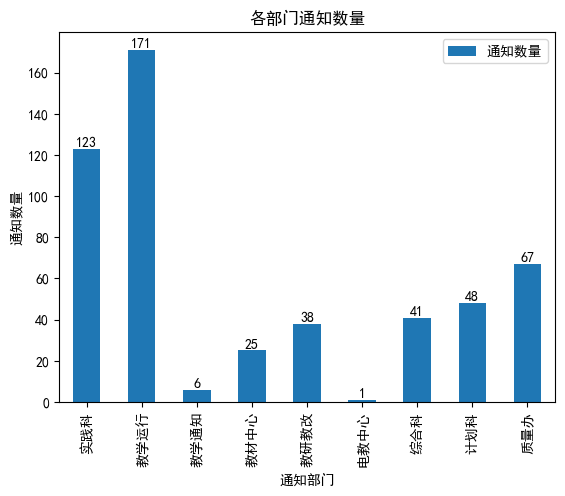

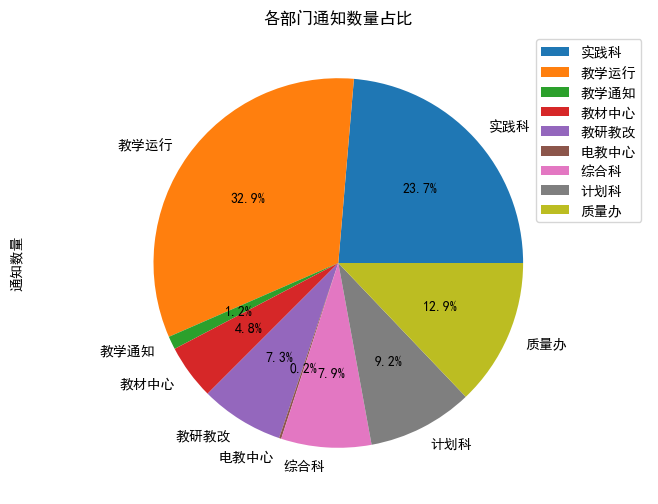

In [2]:

#通知总数量
tot = len(df)

notifierGroup = df.groupby("notifier").agg(
    通知部门=('notifier','first'),
    通知数量=('notifier','size'),
    占比=('notifier',lambda x :str(round(len(x)/tot *100,2)))
).reset_index(drop= True)

display(notifierGroup.style.set_properties(**{'text-align': 'left'}))

plt.rcParams['font.sans-serif'] = ['SimHei']

ax = notifierGroup.plot(kind='bar',x='通知部门',y='通知数量',xlabel='通知部门',ylabel='通知数量',title="各部门通知数量")

ax.bar_label(
    container=ax.containers[0]
)


ax = notifierGroup.plot(
    kind='pie',
    title= "各部门通知数量占比",
    y='通知数量',
    labels = notifierGroup['通知部门'],
    autopct = '%1.1f%%',
    figsize=(8,6)
)

ax.set_aspect('equal', adjustable='datalim')

## 2.**统计通知发布者和附件下载次数的关系**

,通知人,附件下载总次数
0,实践科,199845
1,教学运行,122519
2,教学通知,3160
3,教材中心,23045
4,教研教改,72030
5,电教中心,0
6,综合科,3201
7,计划科,54519
8,质量办,31787


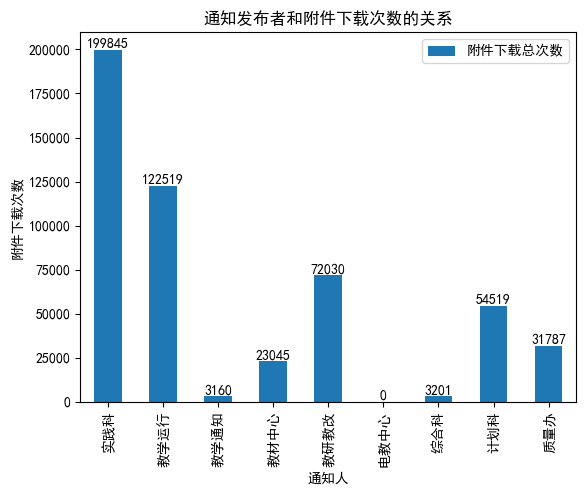

In [3]:
import re

def getDownloadTimes(x):
    a = re.findall(r"(?<=')\d+(?=')",x)
    ans = 0
    for i in a:
        ans += int(i)
    return ans

#把列表转换为数字
df["download_counts"] = df["download_times"].apply(getDownloadTimes)

notifierGroup2 = df.groupby("notifier").agg(
    通知人 = ("notifier","first"),
    附件下载总次数 = ("download_counts","sum")
).reset_index(drop=True)

display(notifierGroup2.style.set_properties(**{'text-align': 'left'}))

ax = notifierGroup2.plot(
    kind='bar',
    x = '通知人',
    y = '附件下载总次数',
    ylabel='附件下载次数',
    title= '通知发布者和附件下载次数的关系'
)

ax.bar_label(
    ax.containers[0]
);


# 3.通知发布的日期统计

1. 统计每天发布的通知数量

In [4]:
dateGroupDaily = df.groupby("date").agg(
    日期 = ("date","first"),
    通知数 = ("date","size")
).reset_index(drop=True)
print(dateGroupDaily.to_string())

             日期  通知数
0    2023-05-18    3
1    2023-05-22    3
2    2023-05-24    1
3    2023-05-26    4
4    2023-05-30    4
5    2023-05-31    1
6    2023-06-01    1
7    2023-06-05    1
8    2023-06-07    1
9    2023-06-09    2
10   2023-06-12    1
11   2023-06-13    1
12   2023-06-14    1
13   2023-06-15    1
14   2023-06-19    2
15   2023-06-20    5
16   2023-06-21    2
17   2023-06-26    1
18   2023-06-27    1
19   2023-06-28    1
20   2023-06-29    1
21   2023-06-30    2
22   2023-07-03    1
23   2023-07-05    1
24   2023-07-08    1
25   2023-08-02    1
26   2023-08-04    1
27   2023-08-14    1
28   2023-08-21    2
29   2023-08-23    1
30   2023-08-26    6
31   2023-08-27    4
32   2023-08-29    2
33   2023-08-30    3
34   2023-09-01    1
35   2023-09-05    1
36   2023-09-06    2
37   2023-09-08    1
38   2023-09-11    1
39   2023-09-14    4
40   2023-09-15    2
41   2023-09-18    2
42   2023-09-19    1
43   2023-09-20    2
44   2023-09-25    1
45   2023-10-08    2
46   2023-10-

2. 统计每月发布的通知数量(更容易看出通知数量在一学期中的分布规律)

通知数量
year month      
2023 5        16
     6        24
     7         3
     8        21
     9        18
     10       13
     11       17
     12       22
2024 1        15
     2        10
     3        17
     4        28
     5        20
     6        26
     7         6
     8        12
     9        32
     10       14
     11       19
     12       31
2025 1        10
     2        10
     3        15
     4        29
     5        29
     6        25
     7         4
     8         2
     9        16
     10        9
     11        7

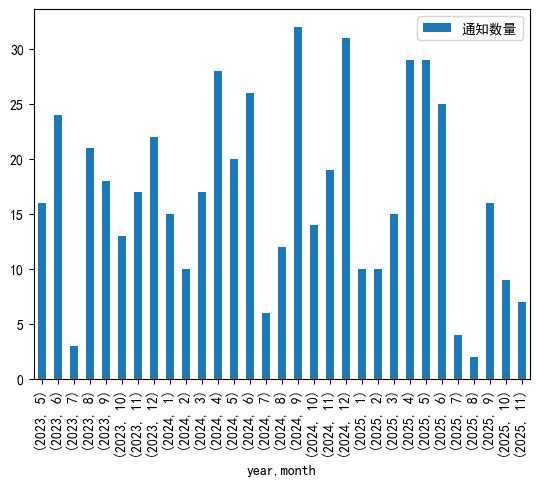

In [5]:
# 转换日期数据

df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# 按照月份分组
dateGroupMonthly = df.groupby(["year","month"]).agg(
    通知数量 = ("date","size")
)
dateGroupMonthly.plot(kind='bar')
display(dateGroupMonthly)

> 可以看出在4,5,6月通知最多,暑假的时候(7,8月份)通知较少

# 4. 通知发布人和附件平均下载次数的关系

In [6]:
# 获取每个通知的附件平均下载次数

df["average_download_times"] =df[df["attachment_cnt"] !=0 ]["download_counts"]/ df[df["attachment_cnt"] !=0 ]["attachment_cnt"]


# 填充
df.fillna(value=0,inplace=True)

groupDownloadTime = df.groupby("notifier").agg(
    通知发布人 = ("notifier","first"),
    平均文件下载次数 = ("average_download_times",lambda x:x[x!=0].mean())
).reset_index(drop=True)

groupDownloadTime.fillna(value=0,inplace=True)

display(groupDownloadTime.style.format(precision=2))

,通知发布人,平均文件下载次数
0,实践科,1985.48
1,教学运行,945.20
2,教学通知,417.58
3,教材中心,570.19
4,教研教改,1334.50
5,电教中心,0.00
6,综合科,283.20
7,计划科,1936.99
8,质量办,654.95
